In [22]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [23]:

df = pd.read_csv("tmdb_5000_movies.csv")

df.head()


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:

#Data Cleaning


In [24]:

df = df[['title', 'overview']]
df['overview'] = df['overview'].fillna("")
df.shape


(4803, 2)

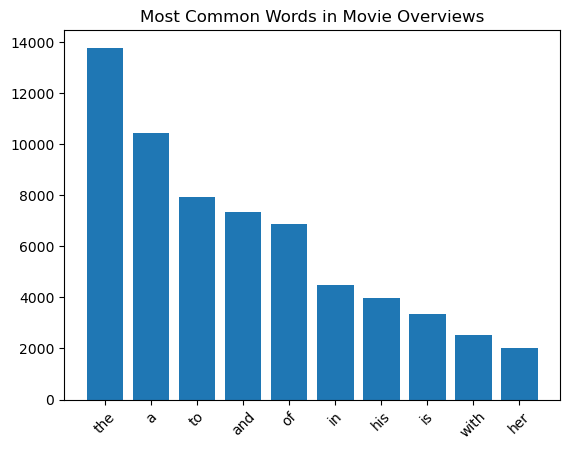

In [28]:
# Content-Based Filtering

text = " ".join(df['overview'])
word_counts = Counter(text.lower().split())
common_words = word_counts.most_common(10)

words, counts = zip(*common_words)

plt.bar(words, counts)
plt.title("Most Common Words in Movie Overviews")
plt.xticks(rotation=45)
plt.show()


In [29]:

# TF-IDF Vectorization

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['overview'])

tfidf_matrix.shape


(4803, 20978)

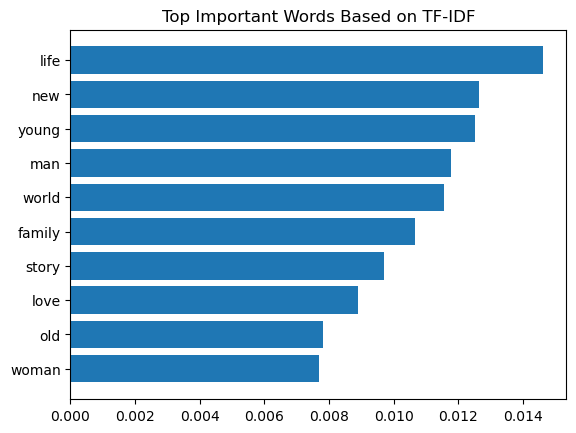

In [32]:
# TF-IDF Feature Importance

feature_names = tfidf.get_feature_names_out()
avg_tfidf = tfidf_matrix.mean(axis=0).A1

top_indices = avg_tfidf.argsort()[-10:]
top_words = feature_names[top_indices]
top_scores = avg_tfidf[top_indices]

plt.barh(top_words, top_scores)
plt.title("Top Important Words Based on TF-IDF")
plt.show()


In [34]:

# Cosine Similarity Calculation

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)


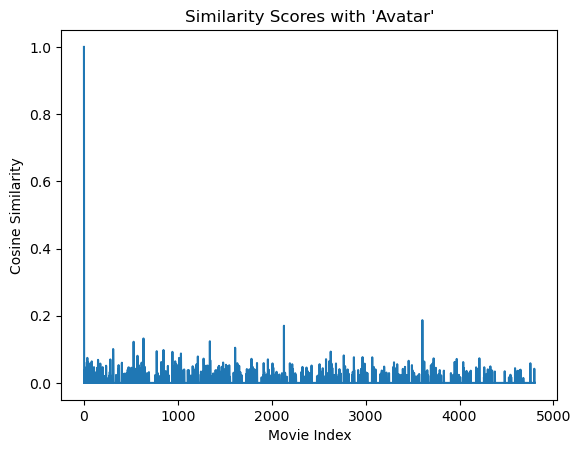

In [35]:

# Similarity Visualization

movie_name = df['title'].iloc[0]
idx = df[df['title'] == movie_name].index[0]

similarity_scores = cosine_sim[idx]

plt.plot(similarity_scores)
plt.title(f"Similarity Scores with '{movie_name}'")
plt.xlabel("Movie Index")
plt.ylabel("Cosine Similarity")
plt.show()


In [38]:

# Recommendation Function


def recommend_movies(movie_title, num_recommendations=5):
    idx = df[df['title'] == movie_title].index[0]
    
    similarity_scores = list(enumerate(cosine_sim[idx]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    
    similarity_scores = similarity_scores[1:num_recommendations+1]
    
    recommended_movies = [df.iloc[i[0]]['title'] for i in similarity_scores]
    similarity_values = [i[1] for i in similarity_scores]
    
    return recommended_movies, similarity_values


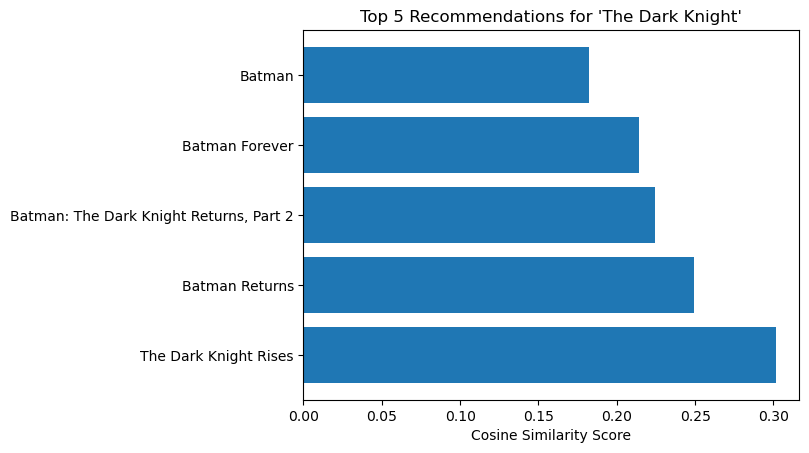

['The Dark Knight Rises',
 'Batman Returns',
 'Batman: The Dark Knight Returns, Part 2',
 'Batman Forever',
 'Batman']

In [40]:

# Display Top 5 Recommendations
movie_input = "The Dark Knight"   
movies, scores = recommend_movies(movie_input)
plt.barh(movies, scores)
plt.xlabel("Cosine Similarity Score")
plt.title(f"Top 5 Recommendations for '{movie_input}'")
plt.show()
movies
